# Data Scientist Exam (Practical Exam DS601P)

## Recipe Site Traffic

## 1. Data Validation
The given set has 947 rows, 8 columns. I have validated all variables and I had to make some changes (see below).


**recipe**:  947 numeric, unique identifiers without missing values. No cleaning is needed.

*nutritional information*

The missing values of **calories, carbohydrate, sugar, protein** will be not replaced by the mean (however grouped by **category** and **servings** columns) as I thought at first. The values of these 4 columns are either missing colmplete in 4 columns or not.  The are only 52 rows with such missing values, which is less than **5,5%**. So they will be dropped.

**calories**: 895 non-null values. Cleaning is needed.

**carbohydrate**: 895 non-null values. Cleaning is needed.

**sugar**:  895 non-null values. Cleaning is needed.

**protein**: 895 non-null values.Cleaning is needed.

*other information*

**category**: 11 unique values without missing values, while there were 10 values in the description. The value 'Chicken Breast' will be replaced by "Chicken"

**servings**: 6 unique values without missing values.  Some of them contain character: '4 as a snack' and '6 as a snack'. These will be transormed in 4 and 6 respectevly. Zhe columns will be converted to integer.

**high_traffic**: only 1 non-null value ("High"). Null values will be replaced with "Low". For the future modelling (Classification) these columns will be replaced by 1 for "High" and 0 for "Low".

After replacing the missing values and dropping the rows, there are **895** rows left and **8** columns. 
**high_traffic** will be a target column.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

file="recipe_site_traffic_2212.csv"
df_recipe=pd.read_csv(file)

In [5]:
df_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [6]:
df_recipe.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


### 1.1 Categorical variables
#### Category

In [7]:
df_recipe["category"].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

As we see there is a category "Chicken Breast" which is not a part of a description, so in will web replaced by chicken

In [8]:
df_recipe['category']=df_recipe['category'].replace({"Chicken Breast": 'Chicken'})
df_recipe["category"].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

#### servings
It should be after cleaning a numeric number.

In [9]:
df_recipe["servings"].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [10]:
df_recipe['servings'] = df_recipe['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
df_recipe["servings"].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

#### high_traffic

In [13]:
df_recipe["high_traffic"].value_counts()

High    574
Name: high_traffic, dtype: int64

In [14]:
df_recipe['high_traffic'].fillna("Low", inplace = True)
df_recipe["high_traffic"].value_counts()

High    574
Low     373
Name: high_traffic, dtype: int64

### 1.2 Numeric variables (nutritional information)

In [15]:
df_recipe[df_recipe["calories"].isna()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [16]:
df_recipe[df_recipe["calories"].isna()].count()

recipe          52
calories         0
carbohydrate     0
sugar            0
protein          0
category        52
servings        52
high_traffic    52
dtype: int64

That was the first idea to replace the missing values by the means grouped by category servings

In [17]:
#df_recipe.groupby(["category","servings"]).agg(lambda x: x.mean())

In [21]:
# Nevertheless
df_recipe_cleaned = df_recipe.dropna(subset=['calories'])   # the same as df_recipe.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein']) 


In [22]:
df_recipe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int32  
 7   high_traffic  895 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 59.4+ KB


In [23]:
df_recipe_cleaned.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


## 2. Exploratory Analysis

I have investigated the target variable **high_traffic** and features of the car, and the relationship between target variable and features.

### 2.1 Single variables analyse

### 2.1.1 categorical variables
Here counterplot would be useful to get the first "impression" of data

Target variable high_traffic

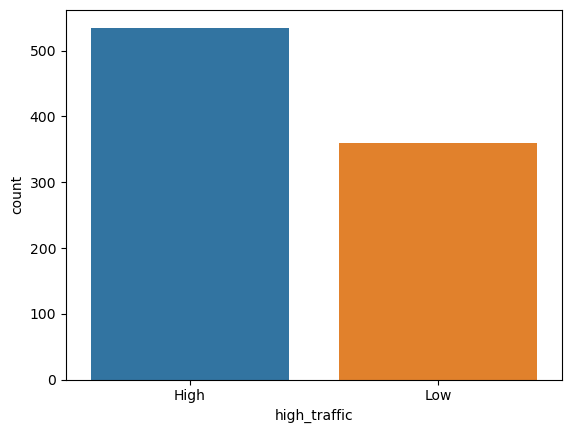

In [29]:
import seaborn as sns

sns.countplot(data=df_recipe_cleaned, x="high_traffic")
plt.show()

Feature **category**

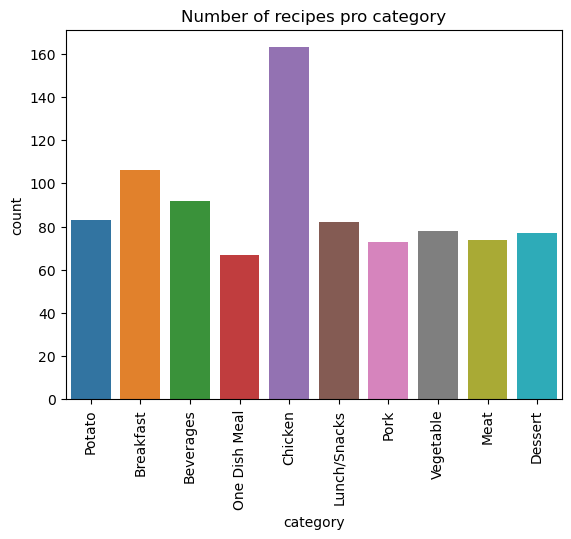

In [30]:
sns.countplot(data=df_recipe_cleaned, x="category")
plt.title('Number of recipes pro category')
plt.xticks(rotation=90)
plt.show()

Here we can see that the number of recipes with chicken is about twice as much the the other ones (except of beverages and Breakfast). Much more interesting will be the investigation if it leads to hight traffic or not.

Feature **servings**

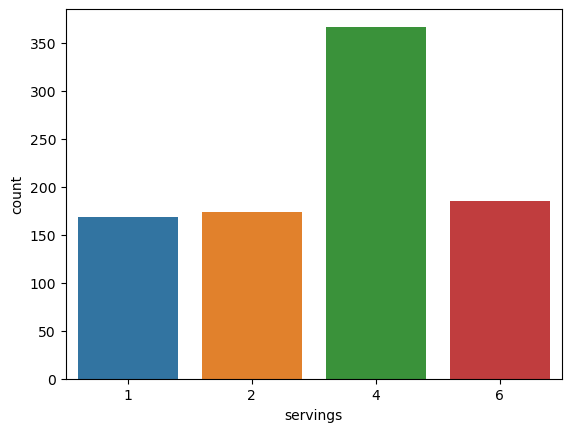

In [31]:
sns.countplot(data=df_recipe_cleaned, x="servings")
plt.show()

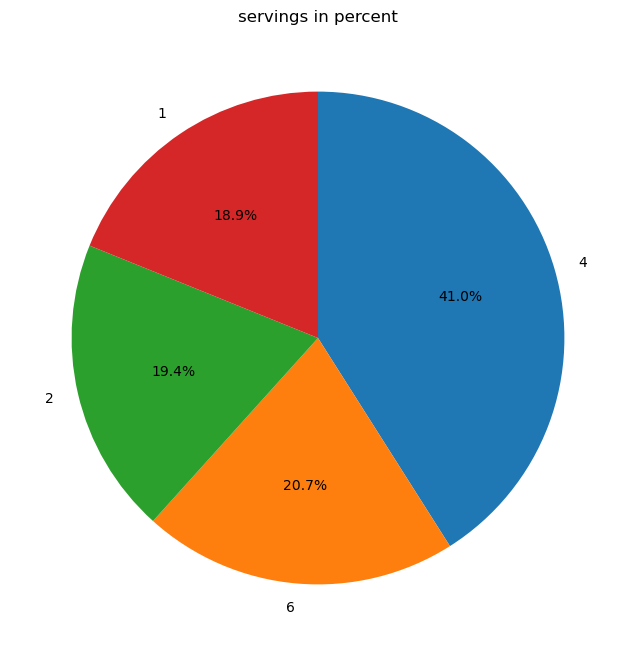

In [32]:
plt.figure(figsize=(8, 8))
df_recipe_cleaned['servings'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('servings in percent')
plt.ylabel('')  # Hide the y-label
plt.show()

As we see the number of recipes with servings = 4 is twice as much as with servings 1,2, and 6. It will be very interesting to see it in the comparison with the target variable

### 2.1.2 numeric variables
calories,  carbohydrate, sugar, protein

calories

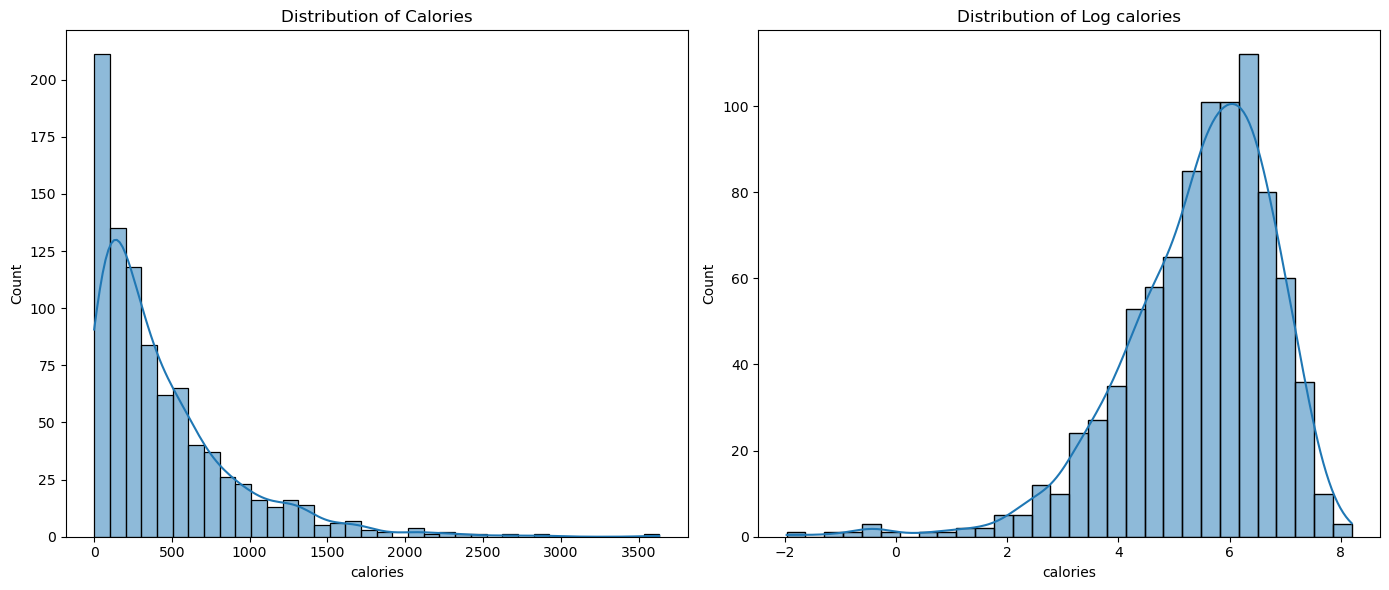

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_recipe_cleaned['calories'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Calories')

# Plot the second histogram (log of carbohydrate) on the right subplot
sns.histplot(np.log(df_recipe_cleaned['calories']), kde=True, ax=ax[1])
ax[1].set_title('Distribution of Log calories')

plt.tight_layout()
plt.show()

carbohydrate

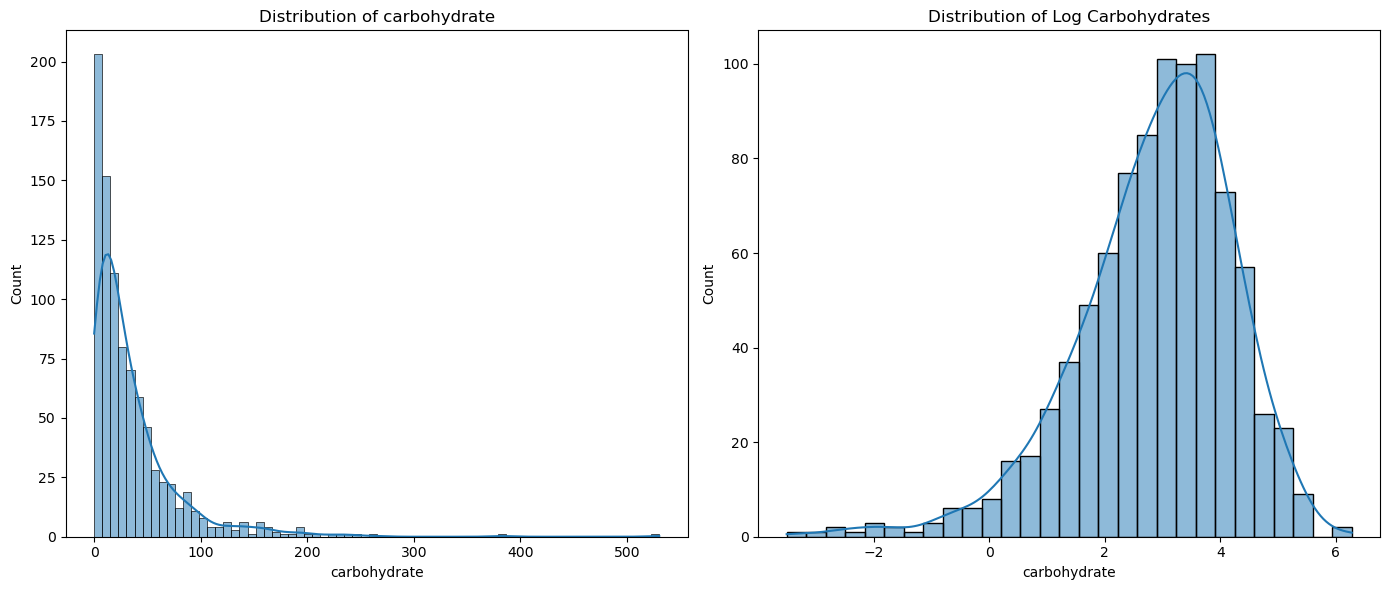

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_recipe_cleaned['carbohydrate'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of carbohydrate')

# Plot the second histogram (log of carbohydrate) on the right subplot
sns.histplot(np.log(df_recipe_cleaned['carbohydrate']), kde=True, ax=ax[1])
ax[1].set_title('Distribution of Log Carbohydrates')

plt.tight_layout()
plt.show()

sugar

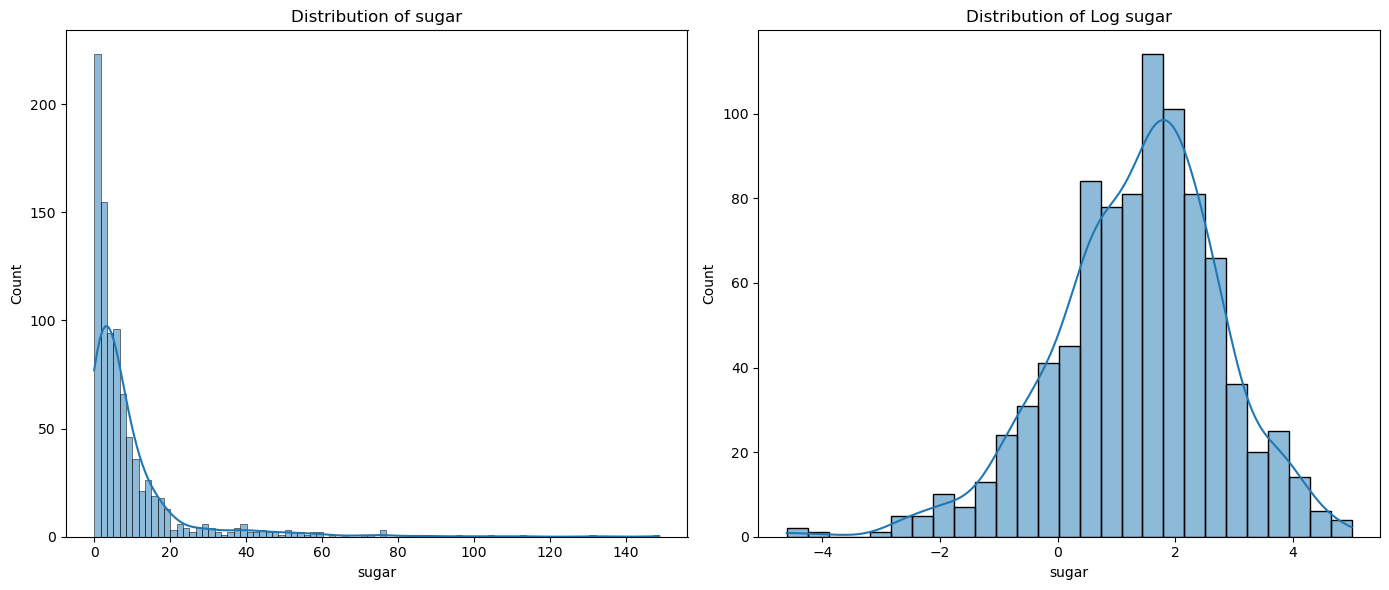

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_recipe_cleaned['sugar'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of sugar')

# Plot the second histogram (log of carbohydrate) on the right subplot
sns.histplot(np.log(df_recipe_cleaned['sugar']), kde=True, ax=ax[1])
ax[1].set_title('Distribution of Log sugar')

plt.tight_layout()
plt.show()

protein

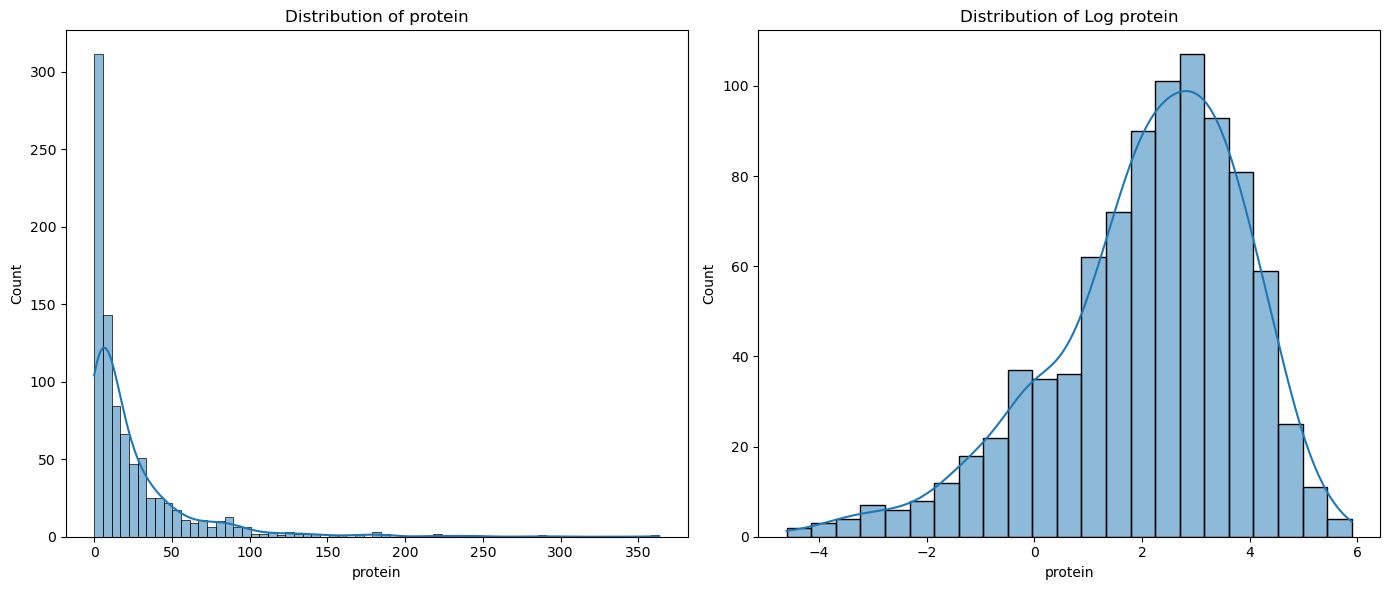

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_recipe_cleaned['protein'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of protein')

# Plot the second histogram (log of carbohydrate) on the right subplot
sns.histplot(np.log(0.01+df_recipe_cleaned['protein']), kde=True, ax=ax[1])
ax[1].set_title('Distribution of Log protein')

plt.tight_layout()
plt.show()

log1p = log(1+x)  is not always good, so I decided to use log(eps + x), where eps = 0.01, as there are recipes with protein = 0 

### 2.2. High_traffic and categorical variables
First of all let us look if the features category and servings have influence on the target variable


**category** and **high_traffic** 

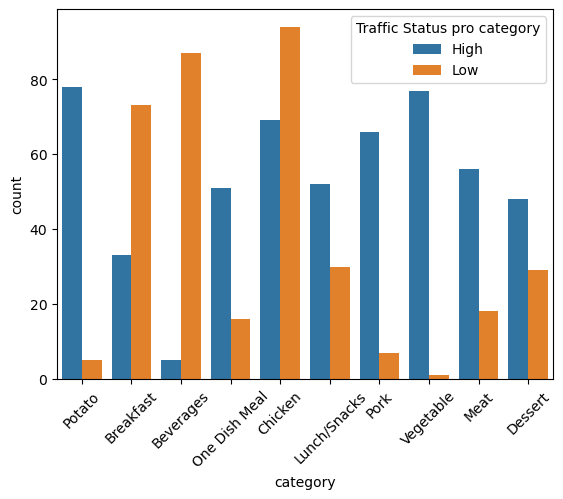

In [44]:
sns.countplot(data=df_recipe_cleaned, x="category", hue="high_traffic")
plt.xticks(rotation=45)
plt.legend(title='Traffic Status pro category')
plt.show()

As we can see *"Potato", "Vegetable", "Pork"* have much more recipes with high traffic,  while e.g. "Beverages" or "Breakfast" do not! 
We can quantify these dependency by calculationg Cramér's V from the chi-squared statistic. As we see below the Cramer-V coefficient is very high : 0.58! 

In [45]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_recipe_cleaned['category'], df_recipe_cleaned['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(round(cramers_v,2))

0.58


**servings** and **high_traffic**

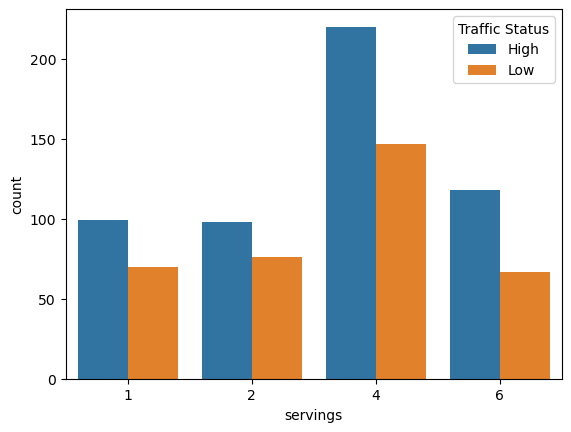

In [46]:
sns.countplot(data=df_recipe_cleaned, x="servings", hue="high_traffic")
plt.legend(title='Traffic Status')
plt.show()

As for **servings**  there doesn't really observed dependancy between **servings** and **high traffic**. And this is confirmed by Cramer V coeffcient. 

In [47]:
contingency_table = pd.crosstab(df_recipe_cleaned['servings'], df_recipe_cleaned['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(round(cramers_v,2))

0.05


Only 0.05 - so no real dependancy.

### 2.3. High_traffic and numeric variables

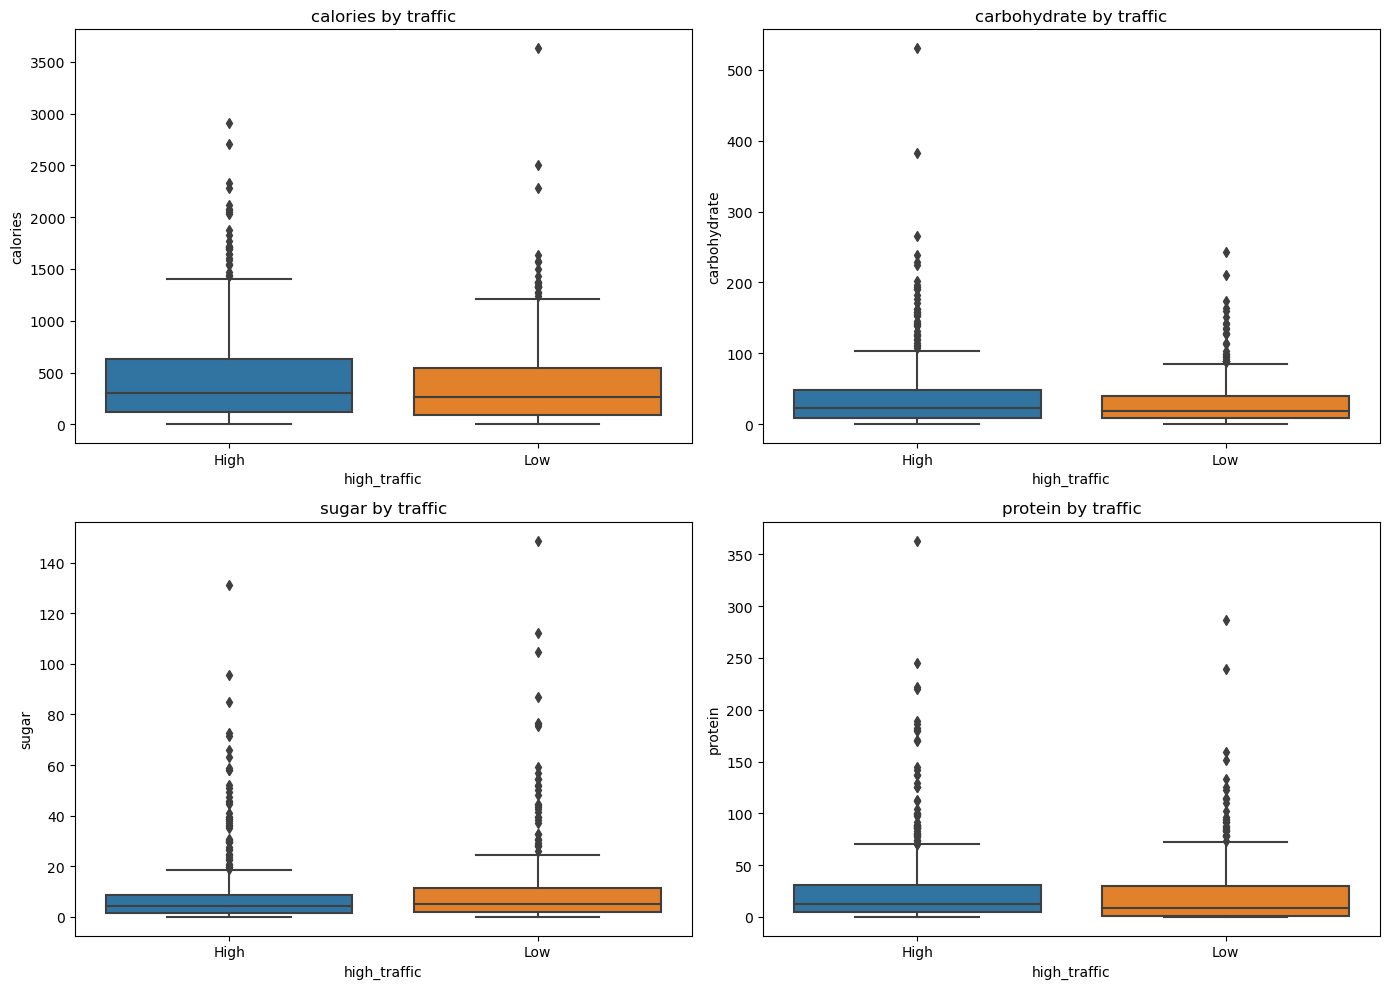

In [49]:
variables = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    sns.boxplot(x='high_traffic', y=var, data=df_recipe_cleaned, ax=axes[row, col])
    axes[row, col].set_title(f'{var} by traffic')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

### 2.4. numeric variables and their interdependecies

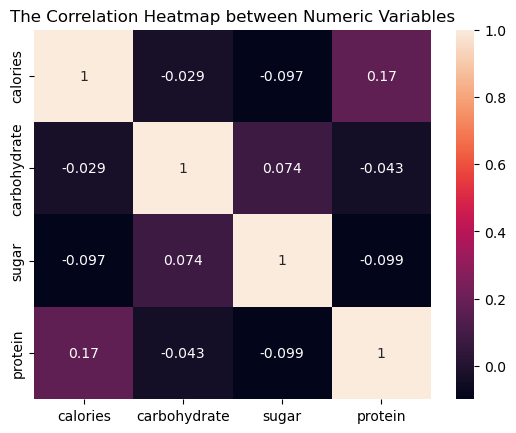

In [50]:
features = ['calories', 'carbohydrate', 'sugar', 'protein']
numeric = df_recipe_cleaned[features]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');

In [51]:
numeric.corr()

,calories,carbohydrate,sugar,protein
calories,1.000000,-0.028970,-0.097302,0.172477
carbohydrate,-0.028970,1.000000,0.073922,-0.042795
sugar,-0.097302,0.073922,1.000000,-0.099053
protein,0.172477,-0.042795,-0.099053,1.000000


Almost no linear correlation between the numeric variables.

### Conclusion
As for categorical features **Category** influences significantly the **high_traffic** while the **servings** not. The linear correlation between numeric features is very low. 

## 3. Model Developement

The prediction the **high_traffic** is a binary **classification** problem.  I will choose 2 Models: **LogisticRegression** and **DecisionTreeClassifier** / **Random Forest Classifier**.  It is often useful for exploring non-linear relationships that could exist between the features and a target variable,  which could be missed by LogisticRegression.

In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, f1_score

### 3.1 Preprocessing

**high_traffic** will be transfomed to integer

from **category** will be created dummy variables.

At first I thought that some numeric values will be logarithmized with addition a small value log(eps + x) and then scaled. I found it is better than log1p(x). But I tried at first no to do it. If necessary It is possible to analyse this.


In [53]:
df_recipe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int32  
 7   high_traffic  895 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 59.4+ KB


In [54]:
df_recipe_model = df_recipe_cleaned.copy()

numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein']


scaler = StandardScaler()

df_recipe_model["high_traffic"] = df_recipe_model["high_traffic"].map({"High" : 1, "Low" : 0})
df_recipe_model[numeric_features]=scaler.fit_transform(df_recipe_model[numeric_features])
df_recipe_model[["servings"]]=scaler.fit_transform(df_recipe_model[["servings"]])
df_recipe_model = pd.get_dummies(df_recipe_model, columns=['category'])


X = df_recipe_model.drop(["recipe", "high_traffic"], axis=1)
y = df_recipe_model["high_traffic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

It is important to use here the parameter **stratify** when splitting the data to test and train!

### 3.2 Logistic Regression

**Simple Modell**

Well, I could have considered other parameters with the help of 

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1). 

For example with:

param_grid = {
    'C': [0.05, 0.1, 0.5, 1],
    'penalty': ["l1", "l2", "elasticnet", None],
    'multi_class': ["auto", "ovr", "multinomial"],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

But I choose just one.



In [55]:
logreg = LogisticRegression(C=1, penalty="l2")
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion matrix:
 [[57 15]
 [25 82]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        72
           1       0.85      0.77      0.80       107

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



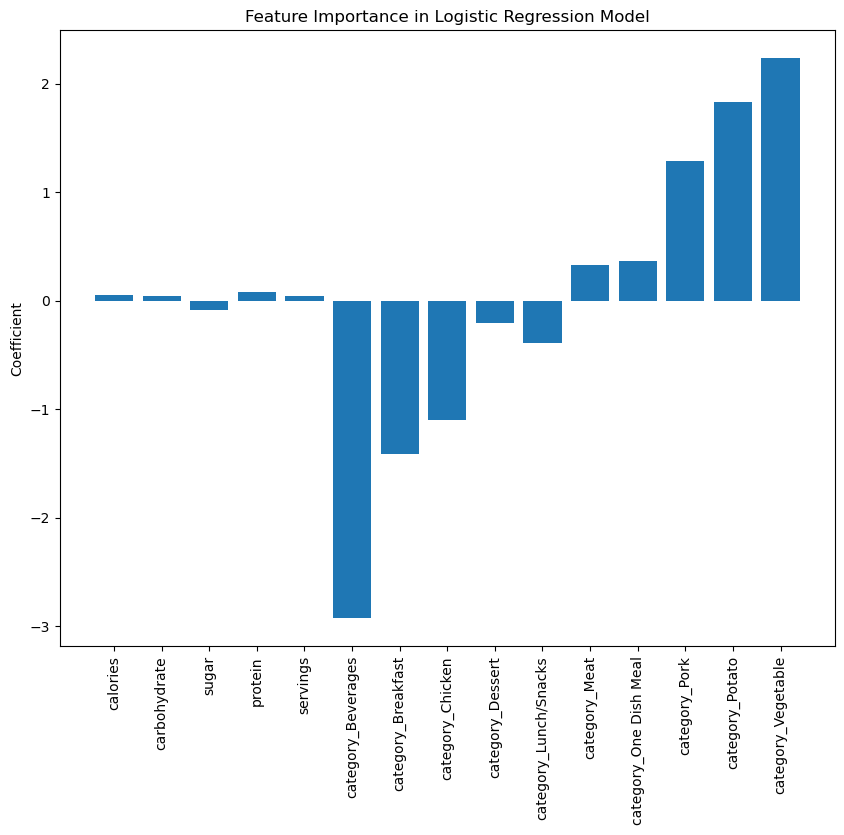

In [56]:
### Feature Importance 

cols = X.columns
importance_dict = {}

model = logreg
coefs = model.coef_[0]

for i, col in enumerate(cols):
    importance_dict[col] = coefs[i]

abs_importance_dict = {k: abs(v) for k, v in importance_dict.items()}

plt.figure(figsize=(10, 8))
plt.bar(importance_dict.keys(), importance_dict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in Logistic Regression Model')
plt.ylabel('Coefficient')
plt.show()

Even if i have already mentioned,  it is now evident that the category as feature has the strongest influence on the high traffic.

### 3.3 DecisionTreeClassifier / RandomForestClassifier

#### 3.3.1. DecisionTreeClassifier

At first I explored only a rather "trivial" model, just with default parameters. 
As the result wasn't good enough (see Evaluation) I reconsidered and the model 
by using a RandomForestClassifier to tune the parameters

In [58]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Confusion matrix:
 [[44 28]
 [31 76]]
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        72
           1       0.73      0.71      0.72       107

    accuracy                           0.67       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.67      0.67      0.67       179



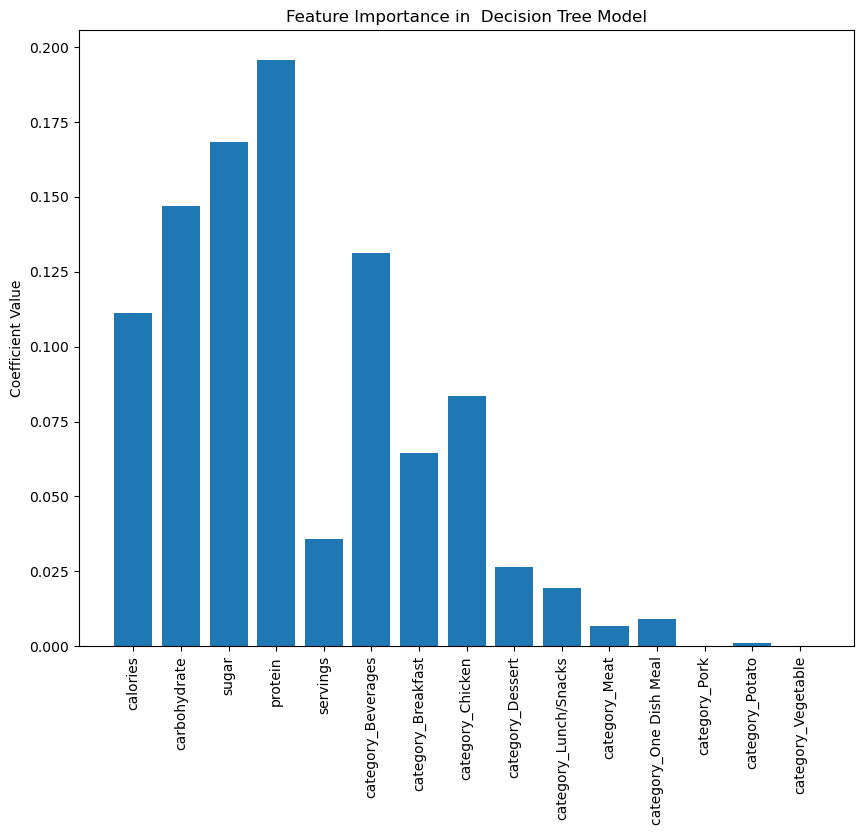

In [59]:
cols = X.columns
importance_dict = {}

model = decision_tree

importances = model.feature_importances_

for i, col in enumerate(cols):
    importance_dict[col] = importances[i]
    
plt.figure(figsize=(10, 8))
plt.bar(importance_dict.keys(), importance_dict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in  Decision Tree Model')
plt.ylabel('Coefficient Value')
plt.show()

#### 3.3.2. RandomForestClassifier
**Tuning the parameters**
According to the email the primary key performance indicator (KPI) is precision and not the accuracy. 

In [60]:
from sklearn.model_selection import StratifiedKFold

X = df_recipe_model.drop(["recipe", "high_traffic"], axis=1)
y = df_recipe_model["high_traffic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=5)

param_grid = {
    'n_estimators': range(5, 105, 10),
    'max_depth': range(1, 10)
}


# grid cross validate and fit
rfc_model = RandomForestClassifier(random_state=42)
rfc_grid_search = GridSearchCV(rfc_model, param_grid, cv=cv, scoring='precision', verbose=1)
rfc_grid_search.fit(X_train, y_train)

# display results
print(f'Best Score: {rfc_grid_search.best_score_}')
print(f'Best Hyperparameters: {rfc_grid_search.best_params_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Score: 0.7680253954327215
Best Hyperparameters: {'max_depth': 9, 'n_estimators': 25}


In [61]:
rfc_best = RandomForestClassifier(**rfc_grid_search.best_params_, random_state=42)
rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion matrix:
 [[51 21]
 [22 85]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70        72
           1       0.80      0.79      0.80       107

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



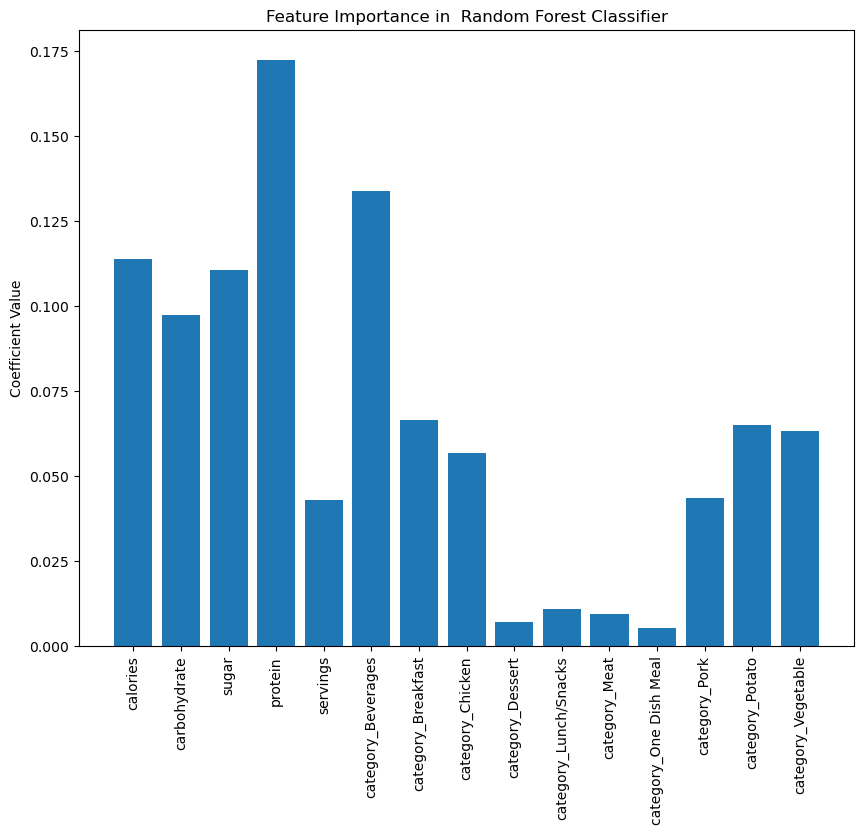

In [62]:
cols = X.columns
importance_dict = {}

model = rfc_best

importances = model.feature_importances_

for i, col in enumerate(cols):
    importance_dict[col] = importances[i]
    
plt.figure(figsize=(10, 8))
plt.bar(importance_dict.keys(), importance_dict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in  Random Forest Classifier')
plt.ylabel('Coefficient Value')
plt.show()

# 4. Model evaluation

As mentioned before, for the evaluation I will be using **precision** as a comparison value. On the other hand it should be necessary to evaluate the **accuracy** and **f1-score**

**precision** - *positive predictive value*

**accuracy** - *the fraction of correctly classified data among the total number of data* - is not always a good measure if for example the dataset is not balanced.

**f1-score** -balances precision and recall(*true positive rate*)

Let us compare the classification report of both models  (well, to be exact 3 Models: Logistic Regression and DecisionTreeClassifier / RandomForestClassifier)

**Logistic Regression**

In [63]:
y_pred = logreg.predict(X_test)
logreg_accuracy = round(accuracy_score(y_test, y_pred),2)
logreg_precision = round(precision_score(y_test, y_pred),2)
logreg_f1score = round(f1_score(y_test, y_pred),2)

print("Precision:", logreg_precision)
print("Accuracy:", logreg_accuracy)
print("F1-Score:", logreg_f1score)
print("Classification report:\n", classification_report(y_test, y_pred))

Precision: 0.85
Accuracy: 0.78
F1-Score: 0.8
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        72
           1       0.85      0.77      0.80       107

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



**Decision Tree**

In [64]:
y_pred = decision_tree.predict(X_test)

tree_accuracy = round(accuracy_score(y_test, y_pred),2)
tree_precision = round(precision_score(y_test, y_pred),2)
tree_f1score = round(f1_score(y_test, y_pred),2)

print("Precision:", tree_precision)
print("Accuracy:", tree_accuracy)
print("F1-Score:", tree_f1score)
print("Classification report:\n", classification_report(y_test, y_pred))


Precision: 0.73
Accuracy: 0.67
F1-Score: 0.72
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        72
           1       0.73      0.71      0.72       107

    accuracy                           0.67       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.67      0.67      0.67       179



**Random Forest**

In [66]:
y_pred = rfc_best.predict(X_test)

rf_accuracy = round(accuracy_score(y_test, y_pred),2)
rf_precision = round(precision_score(y_test, y_pred),2)
rf_f1score = round(f1_score(y_test, y_pred),2)


print("Precision:", rf_precision)
print("Accuracy:", rf_accuracy)
print("F1-Score:", rf_f1score)
print("Classification report:\n", classification_report(y_test, y_pred))

Precision: 0.8
Accuracy: 0.76
F1-Score: 0.8
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70        72
           1       0.80      0.79      0.80       107

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



### Comparison

The Logistic Regression scores 85% of precision and 78% of accuracy which is much better than Decision Tree and slightly better the Random Forest. The latter has a precision over 80% but less than by Logstic Regression.
Further I will compare only Logistic Regression and Random Forest Classifier.

So, Logistic regression can better predict the high traffic (there are fewer false positive predictions).
Also the other parameter as Recall and F1-Score are better by Logistic Regression.

Perhaps it is intersting to tune the parameters also in a Logistic Regression in order to reduce the risk of overfitting.
But for now the Logistic regression is the better model.


**accuracy**  (For the accuracy I chose the minimum value of 0.7)

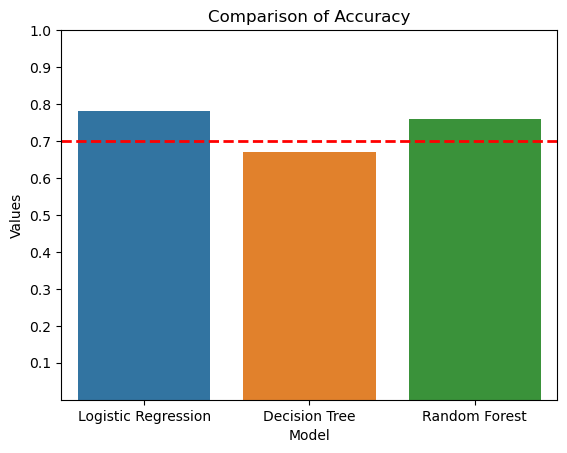

In [67]:
data = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree", "Random Forest"],
    'accuracy': [logreg_accuracy, tree_accuracy, rf_accuracy]
})
horizontal_line_value = 0.70   # self-chosen

sns.barplot(x='Model', y='accuracy', data=data)
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', linewidth=2)
# Customize the plot
plt.ylabel('Values')
plt.title('Comparison of Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# Display the plot
plt.show()

**precision** (Here we have a business goal of 80%)

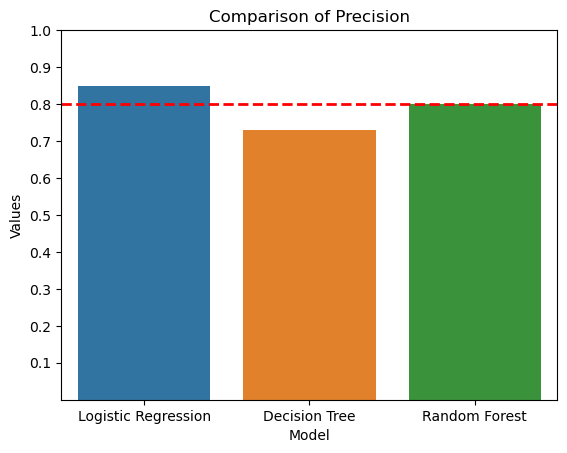

In [68]:
data = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree", "Random Forest"],
    'precision': [logreg_precision, tree_precision, rf_precision]
})
horizontal_line_value = 0.80  # business goal

sns.barplot(x='Model', y='precision', data=data)
plt.axhline(y=horizontal_line_value, color='red', linestyle='--', linewidth=2)
# Customize the plot
plt.ylabel('Values')
plt.title('Comparison of Precision')
plt.ylim(0, 1)  # Set y-axis limits
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# Display the plot

plt.show()

# 5. Definition of as business metric and recommendations

## Metrics

There are 2 main goals of a business:

1. **Predict which recipes will lead to a high traffic**
2. **Correctly predict high traffic recipes 80% of the time.**
   
Unfortunately I cannot see the current business accuracy. But perhaps it is  much less than 70%.  I will consider this value as minimal. 
If the accuracy goes lower one should retune the model!

So I will advise to consider 2 metrics:
- **accuracy** - the first goal
- **precision** - the  second goal

The data should be collected and these metrics should be monitored.


## Recommendations
It is recommended to deploy the Logistic Regression Model to help the Product Manager to predict the high traffic. The Model's precision is estimated by 85%. It is possible to decide in each concrete case if a recipe leads to a high traffic by predicting 1 or 0 (High or Low) based on a new data row.

Nevertheless I would recommend to collect also other data as:

how much time it take for a recipe (in minutes)
approximate costs per serving
difficulty ("easy", "middle", "difficult")
Further by collection the data it is possible to modify the model by deleting and adding the features.

Summary of recommendations:

Prediction for a new recipe ("High/Low traffic")
Monitoring the accuracy and the precision
Collect new features (see above)
Suggestions (if you liked this recipe you can also like this one....)